In [279]:
import numpy as np
import pandas as pd
import re

from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn
seaborn.set(style='ticks')

In [280]:
fermi = pd.read_csv('galactic_fermi_trg.csv', index_col=False)

In [281]:
fermi_clean = fermi.rename(columns=lambda x: x.strip())
fermi_clean = fermi_clean.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
fermi_clean = fermi_clean.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
fermi = fermi_clean

In [282]:
fermi.head()

,trigger_name,name,lii,bii,trigger_type
0,bn120403857,grb120403857,302.1752,-27.8569,grb
1,bn140912846,tgf140912846,302.3060,-28.0394,tgf
2,bn120227725,grb120227725,304.0768,-26.6216,grb
3,bn140630748,tgf140630748,301.3748,-26.4425,tgf
4,bn141205018,grb141205018,305.6055,-27.5957,grb


In [283]:
li = fermi['lii'].tolist()
bi = fermi['bii'].tolist()

In [284]:
len(li)

6484

In [285]:
c = SkyCoord(li, bi, frame='galactic', unit='deg')

In [286]:
c

<SkyCoord (Galactic): (l, b) in deg
    [( 302.1752, -27.8569), ( 302.306 , -28.0394), ( 304.0768, -26.6216),
     ..., ( 122.0478,  28.3266), ( 124.2291,  27.9166),
     ( 121.8252,  27.5836)]>

In [287]:
c.representation_type = 'cartesian'

In [288]:
c

<SkyCoord (Galactic): (u, v, w) [dimensionless]
    [( 0.47080131, -0.74833793, -0.46726488),
     ( 0.47171062, -0.74599945, -0.47007862),
     ( 0.50090327, -0.74047671, -0.44809614), ...,
     (-0.46708784,  0.74611099,  0.47449693),
     (-0.49704487,  0.73058088,  0.46818584),
     (-0.46739124,  0.75308512,  0.46304235)]>

In [289]:
x = []
y = []
z = []

for i in c:
    x.append(float(i.u))
    y.append(float(i.v))
    z.append(float(i.w))

In [290]:
len(x)

6484

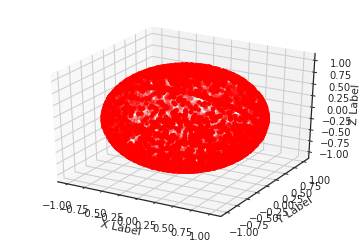

In [291]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [295]:
fermi['u'] = c.u
fermi['v'] = c.v
fermi['w'] = c.w
fermi = fermi.drop(['lii', 'bii'], axis=1)

In [296]:
fermi.head() 

,trigger_name,name,trigger_type,u,v,w
0,bn120403857,grb120403857,grb,0.470801,-0.748338,-0.467265
1,bn140912846,tgf140912846,tgf,0.471711,-0.745999,-0.470079
2,bn120227725,grb120227725,grb,0.500903,-0.740477,-0.448096
3,bn140630748,tgf140630748,tgf,0.466166,-0.764459,-0.445299
4,bn141205018,grb141205018,grb,0.515969,-0.720552,-0.463230


In [297]:
#create unique list of names
d_types = fermi.trigger_type.unique()

#create a data frame dictionary to store your data frames
fermi_dict = {elem : pd.DataFrame for elem in d_types}

for key in fermi_dict.keys():
    fermi_dict[key] = fermi[:][fermi.trigger_type == key]

In [298]:
fermi_dict.keys()

dict_keys(['grb', 'tgf', 'loclpar', 'uncert', 'distpar', 'sgr', 'transnt', 'sflare', 'unreloc', 'sfl', 'galbin'])

In [299]:
len(fermi_dict['grb']['u'].tolist())

2403

In [301]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, iplot_mpl

init_notebook_mode(connected=True)

traces = []

for k in fermi_dict.keys():
    a = go.Scatter3d(
        x=fermi_dict[k]['u'].tolist(),
        y=fermi_dict[k]['v'].tolist(),
        z=fermi_dict[k]['w'].tolist(),
        name=k,
        mode='markers',
        marker=dict(
            size=2,
            line=dict(
                #color='red',
                colorscale='Viridis',
                width=0.9
            ),
            opacity=0.8
        )
    )
    
    traces.append(a)
  

data = traces
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='GRB coordinates')

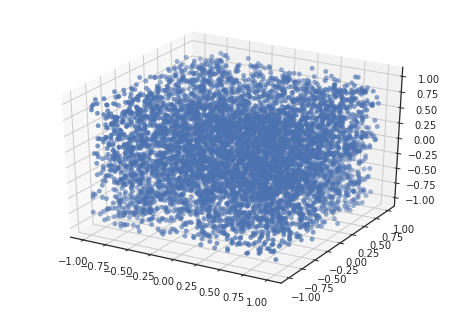

In [249]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = x
sequence_containing_y_vals = y
sequence_containing_z_vals = z

random.shuffle(sequence_containing_x_vals)
random.shuffle(sequence_containing_y_vals)
random.shuffle(sequence_containing_z_vals)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
pyplot.show()

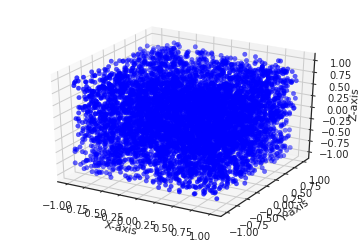

In [251]:
   fig = plt.figure()
   ax = fig.add_subplot(111, projection='3d')

   # Generate the values
   x_vals = x
   y_vals = y
   z_vals = z

   # Plot the values
   ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
   ax.set_xlabel('X-axis')
   ax.set_ylabel('Y-axis')
   ax.set_zlabel('Z-axis')

   plt.show()

In [ ]:
# TODO: color code grb vs tgf
